# Regularization with Linear Models

## Training a Linear Regression with scikit-learn

In [2]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
# Load the California housing dataset
X, y = fetch_california_housing(return_X_y=True)
X = np.concatenate([X, X*X], axis=1)

In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Rescale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Fit the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
# Print the R2-score on train and test
print('R2-score on train set:', lr.score(X_train, y_train))
print('R2-score on test set:', lr.score(X_test, y_test))

R2-score on train set: 0.6323843381852894
R2-score on test set: -1.2472000127402643


In [8]:
print('w values:', lr.coef_)
print('b value:', lr.intercept_)

w values: [ 1.12882772e+00 -6.48931138e-02 -4.04087026e-01  4.87937619e-01
 -1.69895164e-03 -4.09553062e-01 -3.72826365e+00 -8.38728583e+00
 -2.67065542e-01  2.04856554e-01  2.46387700e-01 -3.19674747e-01
  2.58750270e-03  3.91054062e-01  2.82040287e+00 -7.50771410e+00]
b value: 2.072498958939411


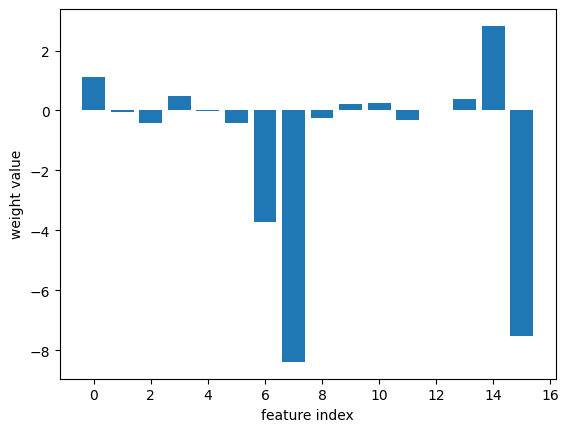

In [9]:
import matplotlib.pyplot as plt

plt.bar(np.arange(len(lr.coef_)), lr.coef_)
plt.xlabel('feature index')
plt.ylabel('weight value')
plt.show()

## Regularize with Ridge Regression

In [10]:
from sklearn.linear_model import Ridge

In [11]:
# Fit the Ridge model
ridge = Ridge(alpha=5000)
ridge.fit(X_train, y_train)

Ridge(alpha=5000)

In [12]:
# Print the R2-score on train and test
print('R2-score on train set:', ridge.score(X_train, y_train))
print('R2-score on test set:', ridge.score(X_test, y_test))

R2-score on train set: 0.5398290317808138
R2-score on test set: 0.5034148460338739


In [13]:
print('theta values:', ridge.coef_)
print('b value:', ridge.intercept_)

theta values: [ 0.43456599  0.06311698  0.00463607  0.00963748  0.00896739 -0.05894055
 -0.17177956 -0.15109744  0.22933247  0.08516982  0.01842825 -0.01049763
 -0.00358684  0.03935491 -0.17562536  0.1507696 ]
b value: 2.07249895893891


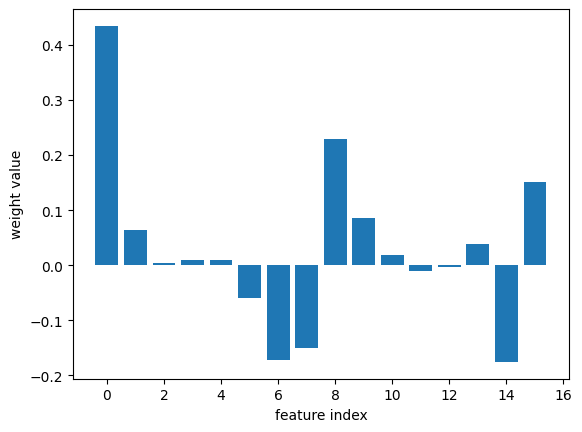

In [14]:
plt.bar(np.arange(len(ridge.coef_)), ridge.coef_)
plt.xlabel('feature index')
plt.ylabel('weight value')
plt.show()

## Regularize with Lasso regression

In [16]:
from sklearn.linear_model import Lasso

In [17]:
# Fit the Lasso model
lasso = Lasso(alpha=0.02)
lasso.fit(X_train, y_train)

/home/vince/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.616e+00, tolerance: 2.210e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.02)

In [18]:
# Print the R2-score on train and test
print('R2-score on train set:', lasso.score(X_train, y_train))
print('R2-score on test set:', lasso.score(X_test, y_test))

R2-score on train set: 0.5949103710772492
R2-score on test set: 0.57350350155955


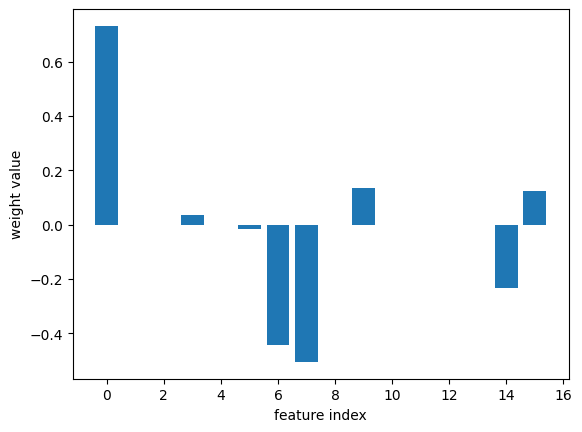

In [19]:
plt.bar(np.arange(len(lasso.coef_)), lasso.coef_)
plt.xlabel('feature index')
plt.ylabel('weight value')
plt.show()

## Regularize with an Elastic Net regression

In [17]:
from sklearn.linear_model import ElasticNet

In [18]:
# Fit the LASSO model
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [9]:
# Print the R2-score on train and test
print('R2-score on train set:', elastic.score(X_train, y_train))
print('R2-score on test set:', elastic.score(X_test, y_test))

R2-score on train set: 0.539957010948829
R2-score on test set: 0.5134203748307193


## Training a Logistic Regression

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

In [21]:
# Load the dataset
X, y = load_breast_cancer(return_X_y=True)

In [22]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Rescale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Fit the logistic regression model with no regularization
lr = LogisticRegression(penalty='none')
lr.fit(X_train, y_train)

LogisticRegression(penalty='none')

In [25]:
# Print the accuracy score on train and test
print('Accuracy on train set:', lr.score(X_train, y_train))
print('Accuracy on test set:', lr.score(X_test, y_test))

Accuracy on train set: 1.0
Accuracy on test set: 0.9385964912280702


## Regularize a Logistic Regression

In [26]:
lr = LogisticRegression(penalty='l2', C=0.1)

In [27]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [28]:
# Print the accuracy score on train and test
print('Accuracy on train set:', lr.score(X_train, y_train))
print('Accuracy on test set:', lr.score(X_test, y_test))

Accuracy on train set: 0.9802197802197802
Accuracy on test set: 0.9824561403508771


/home/vince/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


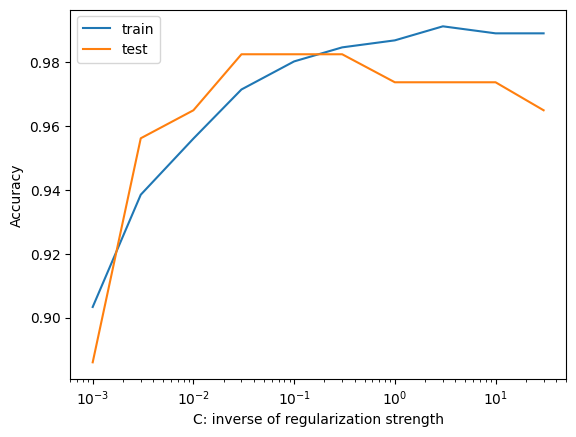

In [29]:
accuracy_train = []
accuracy_test = []
c_values = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
for c in c_values:
    lr = LogisticRegression(penalty='l2', C=c)
    lr.fit(X_train, y_train)
    accuracy_train.append(lr.score(X_train, y_train))
    accuracy_test.append(lr.score(X_test, y_test))
    
plt.plot(c_values, accuracy_train, label='train')
plt.plot(c_values, accuracy_test, label='test')
plt.legend()
plt.xlabel('C: inverse of regularization strength')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

## Choosing the right regularization

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
# Define the hyperparameters we want to test
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.03, 0.06, 0.1, 0.3, 0.6]
}

In [32]:
# Instantiate the grid search object
grid = GridSearchCV(
    LogisticRegression(solver='liblinear'),
    param_grid,
    scoring='accuracy',
    cv=5
)

In [33]:
# Fit and wait
grid.fit(X_train, y_train)
# Print the best set of hyperparameters
print('best hyperparameters:', grid.best_params_)

best hyperparameters: {'C': 0.06, 'penalty': 'l2'}


In [34]:
# Print the accuracy score on train and test
print('Accuracy on train set:', grid.score(X_train, y_train))
print('Accuracy on test set:', grid.score(X_test, y_test))

Accuracy on train set: 0.9824175824175824
Accuracy on test set: 0.9912280701754386
